# Introdução
Este projeto que se segue foi realizado por Gonçalo Casanova Brito (2231919@iscap.ipp.pt) relativo à Unidade Curricular de Métodos de Otimização de Gestão.

# Explicação do problema
Uma determinada região está a ser ameaçada pela ruptura de uma barragem e deve ser evacuada em,
no máximo, dez horas. São no total 8.000 homens, 7.900 mulheres e 1.850 crianças a transportar. Cada
pessoa poderá levar até dez quilos de bagagem pessoal. Toda a região foi isolada e só circulam veículos
autorizados para que se evitem acidentes e engarrafamentos. Para efetuar a evacuação estão disponíveis os meios:

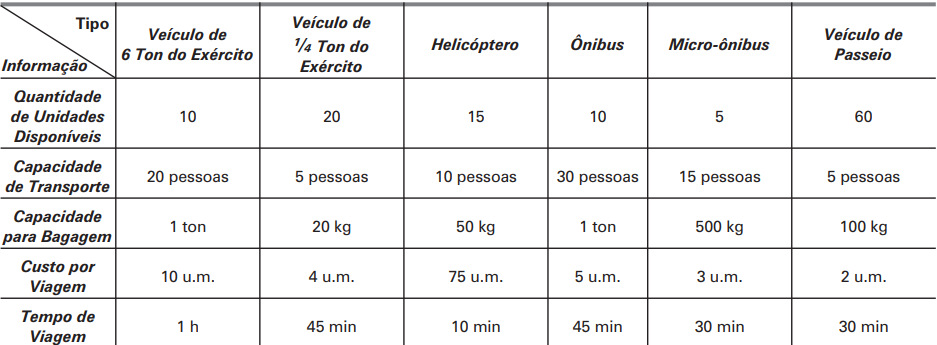

Para minimizar o pânico, as crianças deverão viajar acompanhadas pelas suas mães. Existem 10 famílias com 5 filhos, 25 com 4 filhos, 150 com 3, 450 com 2 e 350 com 1. Os carros de passeio só poderão
fazer uma viagem de evacuação, ficando, por segurança, retidos fora da área de perigo.
Qual o programa de evacuação que minimiza os custos finais da operação?

In [ ]:
%pip install gurobipy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB, Model, quicksum

**Índices e Conjuntos**

Sendo i o tipo de familía e existindo 6 tipos de família, i.e.  i=1,2,...,6 . i={1,2,...,6} .
Sendo j o tipo de veículos e existindo 6 tipos de veículos, i.e.  j=1,2,...,6 . j={1,2,...,6} .
Sendo k o número de viagens, i.e k=1, 2, ..., 60. k={1,2,...,60} .


In [ ]:
I = range(0,6)
J = range(0,6)
K = range(0,47)

for a in I:
  print(a)


0
1
2
3
4
5


**Parâmetros**

Como parâmetros conhecidos temos:

ai é o número de famílias do tipo i

bi é o número de pessoas de famílias do tipo i

ci é o peso total de malas por familia do tipo i

di é a capacidade de transporte de pessoas do veículo do tipo j

ei é o custo de viagem do veículo do tipo j

fi é o tempo de viagem do veículo do tipo j

gi é a capacidade de bagagem do veículo do tipo j

hi é o número máximo de viagens do veículo do tipo j


In [ ]:
e = pd.Series([100, 60, 1125, 50, 15, 120])
a = pd.Series([14915, 350, 450, 150, 25, 10])
b = pd.Series([1,2,3,4,5,6])
c = pd.Series([10,20,30,40,50,60])
d = pd.Series([200, 100, 150, 300, 75, 300])
g = pd.Series([10000 ,400, 750,10000 , 2500, 600])
h = pd.Series([50, 1200, 195, 200, 100, 60])
l = pd.Series([10,20,15,10,5,60])
e

0     100
1      60
2    1125
3      50
4      15
5     120
dtype: int64

## **Variáveis de Decisão**



A variável Xijk representa o tipo de família I que se segue no veículo do tipo J no número de viagem K.

A variável Yjk é uma variável binária que representa se o veículo J segue ou não na viagem K.

In [ ]:
modelo = gp.Model()

x = modelo.addVars(I, J, K, name = 'Variável x', vtype=GRB.CONTINUOUS)

y = modelo.addVars(J, K, name = 'Variável y', vtype=GRB.BINARY)

modelo.update()

**Função objetivo**

\begin{equation}
\text{Min} \quad Z = \sum_{jk} e_{j}.Y_{i,j}
\tag{0}
\end{equation}

A função objetivo calcula o custo total da evacuação considerando todos os veículos disponíveis e as famílias a serem evacuadas. É multiplicado o custo de viagem de cada tipo de veículo pelo valor binário
Yij
  correspondente à utilização desse veículo para evacuar a família do tipo
i. A soma é realizada sobre todos os tipos de veículos (
j) e todas as famílias (
i).

In [ ]:
objetivo = modelo.setObjective(gp.quicksum(e[j]*y[j,k] for j in J for k in K), GRB.MINIMIZE)

# **Restrições**

Restrição número de familias do tipo i que vão no veículo j na viagem k



\begin{equation}
\sum_{j,k} X_{i,j,k} = ai
\tag{1}
\end{equation}

In [ ]:
#Número de familias do tipo i que vão no veículo j na viagem k

n_familias = modelo.addConstrs(gp.quicksum(x[i,j,k] for j in J for k in K) == a[i] for i in I)

Restrição número de pessoas que vão no carro j na viagem k


\begin{equation}
\sum_{i} X_{i,j,k}. bi \leq dj.Y_{i,j}\ \forall j \forall k
\tag{2}
\end{equation}

In [ ]:
#Número de pessoas que vão no carro j na viagem k

n_pessoas = modelo.addConstrs(gp.quicksum(x[i,j,k] * b[i] for i in I) <= d[j] * y[j,k] for j in J for k in K)

Restrição capacidade máxima de bagagem do tipo da familia i que pode ir no veículo j

\begin{equation}
\sum_{i} X_{i,j,k}.ci\leq gi\ \forall j \forall k
\tag{3}
\end{equation}

In [ ]:
# Capacidade máxima de bagagem do tipo da familia i que pode ir no veículo j

bagagem_max = modelo.addConstrs(gp.quicksum(x[i,j,k] * c[i] for i in I) <= g[j] for j in J for k in K)

Restrição número máximo de viagens k que pode fazer um veículo tipo j

\begin{equation}
\sum_{k} Y_{j,k}\leq hi\ \forall j
\tag{4}
\end{equation}

In [ ]:
# Número máximo de viagens k que pode fazer um veículo tipo j

viagens_max = modelo.addConstrs(gp.quicksum(y[j,k] for k in K) <= h[j] for j in J)

In [ ]:
modelo.update()

# **Obter a Solução**

In [ ]:
modelo.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 576 rows, 1974 columns and 5640 nonzeros
Model fingerprint: 0xe64a8fb3
Variable types: 1692 continuous, 282 integer (282 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [2e+01, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+04]
Presolve removed 288 rows and 0 columns
Presolve time: 0.02s
Presolved: 288 rows, 1974 columns, 3666 nonzeros
Variable types: 1692 continuous, 282 integer (282 binary)
Found heuristic solution: objective 29040.000000

Root relaxation: objective 3.117500e+03, 424 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Ti

In [ ]:
# Verifique se a otimização foi bem-sucedida
if modelo.status == GRB.OPTIMAL:
    print("Solução ótima encontrada!")

    # Imprima os valores das variáveis de decisão na solução ótima
    for i in I:
        for j in J:
            for k in K:
                if x[i,j,k].x > 0:
                    print(f"Variável x[{i},{j},{k}] = {x[i,j,k].x}")

    for j in J:
        for k in K:
            if y[j,k].x > 0:
                print(f"Variável y[{j},{k}] = {y[j,k].x}")
else:
    print("Não foi possível encontrar uma solução ótima.")

Solução ótima encontrada!
Variável x[0,0,0] = 125.0
Variável x[0,3,0] = 300.0
Variável x[0,3,1] = 275.0
Variável x[0,3,2] = 300.0
Variável x[0,3,4] = 300.0
Variável x[0,3,5] = 300.0
Variável x[0,3,6] = 300.0
Variável x[0,3,7] = 300.0
Variável x[0,3,8] = 300.0
Variável x[0,3,9] = 300.0
Variável x[0,3,11] = 300.0
Variável x[0,3,12] = 300.0
Variável x[0,3,13] = 300.0
Variável x[0,3,14] = 300.0
Variável x[0,3,15] = 300.0
Variável x[0,3,16] = 300.0
Variável x[0,3,17] = 300.0
Variável x[0,3,18] = 300.0
Variável x[0,3,19] = 300.0
Variável x[0,3,20] = 300.0
Variável x[0,3,21] = 300.0
Variável x[0,3,22] = 300.0
Variável x[0,3,24] = 300.0
Variável x[0,3,25] = 300.0
Variável x[0,3,26] = 300.0
Variável x[0,3,27] = 300.0
Variável x[0,3,28] = 300.0
Variável x[0,3,29] = 300.0
Variável x[0,3,30] = 300.0
Variável x[0,3,31] = 300.0
Variável x[0,3,32] = 300.0
Variável x[0,3,33] = 300.0
Variável x[0,3,35] = 300.0
Variável x[0,3,36] = 115.0
Variável x[0,3,37] = 300.0
Variável x[0,3,39] = 300.0
Variável x[0

In [ ]:
# Verifique se a otimização foi bem-sucedida
if modelo.status == GRB.OPTIMAL:
    print("Solução ótima encontrada!")

    # Imprima o valor total da função objetivo na solução ótima
    print("Total da função objetivo:", modelo.objVal)
else:
    print("Não foi possível encontrar uma solução ótima.")

Solução ótima encontrada!
Total da função objetivo: 3140.0


# Solução

A minimização do problema teve uma solução ótima de 3140€.

# Novo Problema

Houve um aumento do preço do petróleo devido a uma crise de produção. Na mesma altura, os helicópteros tiveram que fazer manutenção por já se encontrarem com alguma idade, formule o problema de maneira a minizar os custos com os novos dados.

In [ ]:
I = range(0,6)
J = range(0,5)
K = range(0,47)

for a in I:
  print(a)

0
1
2
3
4
5


In [ ]:
e = pd.Series([150, 90, 70, 37, 200])
a = pd.Series([14915, 350, 450, 150, 25, 10])
b = pd.Series([1,2,3,4,5,6])
c = pd.Series([10,20,30,40,50,60])
d = pd.Series([200, 100, 300, 75, 300])
g = pd.Series([10000 ,400, 10000 , 2500, 600])
h = pd.Series([50, 1200, 200, 100, 60])
l = pd.Series([10,20,15,10,5,60])

In [ ]:
modelo = gp.Model()

x = modelo.addVars(I, J, K, name = 'Variável x', vtype=GRB.CONTINUOUS)

y = modelo.addVars(J, K, name = 'Variável y', vtype=GRB.BINARY)

modelo.update()

In [ ]:
objetivo = modelo.setObjective(gp.quicksum(e[j]*y[j,k] for j in J for k in K), GRB.MINIMIZE)

In [ ]:
#Número de familias do tipo i que vão no veículo j na viagem k

n_familias = modelo.addConstrs(gp.quicksum(x[i,j,k] for j in J for k in K) == a[i] for i in I)

In [ ]:
#Número de pessoas que vão no carro j na viagem k

n_pessoas = modelo.addConstrs(gp.quicksum(x[i,j,k] * b[i] for i in I) <= d[j] * y[j,k] for j in J for k in K)

In [ ]:
# Capacidade máxima de bagagem do tipo da familia i que pode ir no veículo j

bagagem_max = modelo.addConstrs(gp.quicksum(x[i,j,k] * c[i] for i in I) <= g[j] for j in J for k in K)

In [ ]:
# Número máximo de viagens k que pode fazer um veículo tipo j

viagens_max = modelo.addConstrs(gp.quicksum(y[j,k] for k in K) <= h[j] for j in J)

In [ ]:
modelo.update()

In [ ]:
modelo.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 481 rows, 1645 columns and 4700 nonzeros
Model fingerprint: 0xe31b20c3
Variable types: 1410 continuous, 235 integer (235 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  Objective range  [4e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+04]
Presolve removed 240 rows and 0 columns
Presolve time: 0.02s
Presolved: 241 rows, 1645 columns, 3055 nonzeros
Variable types: 1410 continuous, 235 integer (235 binary)
Found heuristic solution: objective 14603.000000
Found heuristic solution: objective 10510.000000

Root relaxation: objective 5.122750e+03, 388 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Dept

In [ ]:
# Verifique se a otimização foi bem-sucedida
if modelo.status == GRB.OPTIMAL:
    print("Solução ótima encontrada!")

    # Imprima os valores das variáveis de decisão na solução ótima
    for i in I:
        for j in J:
            for k in K:
                if x[i,j,k].x > 0:
                    print(f"Variável x[{i},{j},{k}] = {x[i,j,k].x}")

    for j in J:
        for k in K:
            if y[j,k].x > 0:
                print(f"Variável y[{j},{k}] = {y[j,k].x}")
else:
    print("Não foi possível encontrar uma solução ótima.")

Solução ótima encontrada!
Variável x[0,0,18] = 200.0
Variável x[0,2,0] = 300.0
Variável x[0,2,1] = 300.0
Variável x[0,2,2] = 300.0
Variável x[0,2,3] = 300.0
Variável x[0,2,4] = 300.0
Variável x[0,2,5] = 300.0
Variável x[0,2,6] = 300.0
Variável x[0,2,7] = 300.0
Variável x[0,2,8] = 300.0
Variável x[0,2,9] = 300.0
Variável x[0,2,11] = 300.0
Variável x[0,2,13] = 300.0
Variável x[0,2,14] = 300.0
Variável x[0,2,15] = 300.0
Variável x[0,2,17] = 300.0
Variável x[0,2,18] = 300.0
Variável x[0,2,19] = 300.0
Variável x[0,2,20] = 300.0
Variável x[0,2,22] = 300.0
Variável x[0,2,24] = 300.0
Variável x[0,2,25] = 300.0
Variável x[0,2,27] = 300.0
Variável x[0,2,28] = 300.0
Variável x[0,2,29] = 300.0
Variável x[0,2,30] = 300.0
Variável x[0,2,31] = 165.0
Variável x[0,2,32] = 300.0
Variável x[0,2,33] = 300.0
Variável x[0,2,34] = 300.0
Variável x[0,2,35] = 300.0
Variável x[0,2,36] = 300.0
Variável x[0,2,37] = 300.0
Variável x[0,2,38] = 300.0
Variável x[0,2,39] = 300.0
Variável x[0,2,40] = 300.0
Variável x[0

In [ ]:
# Verifique se a otimização foi bem-sucedida
if modelo.status == GRB.OPTIMAL:
    print("Solução ótima encontrada!")

    # Imprima o valor total da função objetivo na solução ótima
    print("Total da função objetivo:", modelo.objVal)
else:
    print("Não foi possível encontrar uma solução ótima.")

Solução ótima encontrada!
Total da função objetivo: 5142.0


Houve um aumento de 2002€ da minimização dos custos. Para um valor de 5142€.